## Figure 3-3 The proportion of Total Annualised Cost per Household (TACH) for each category of sewer pipes without pumping. The pie chart on the left side shows the proportion of TACH for each cost category (Direct/Indirect CapEx and Direct/Indirect OpEx), and the bar chart on the right side presents the proportion of breaking down cost items for each category

In [391]:
import pandas as pd
import matplotlib.pyplot as plt


In [400]:
path_excel = r'data.xlsx'

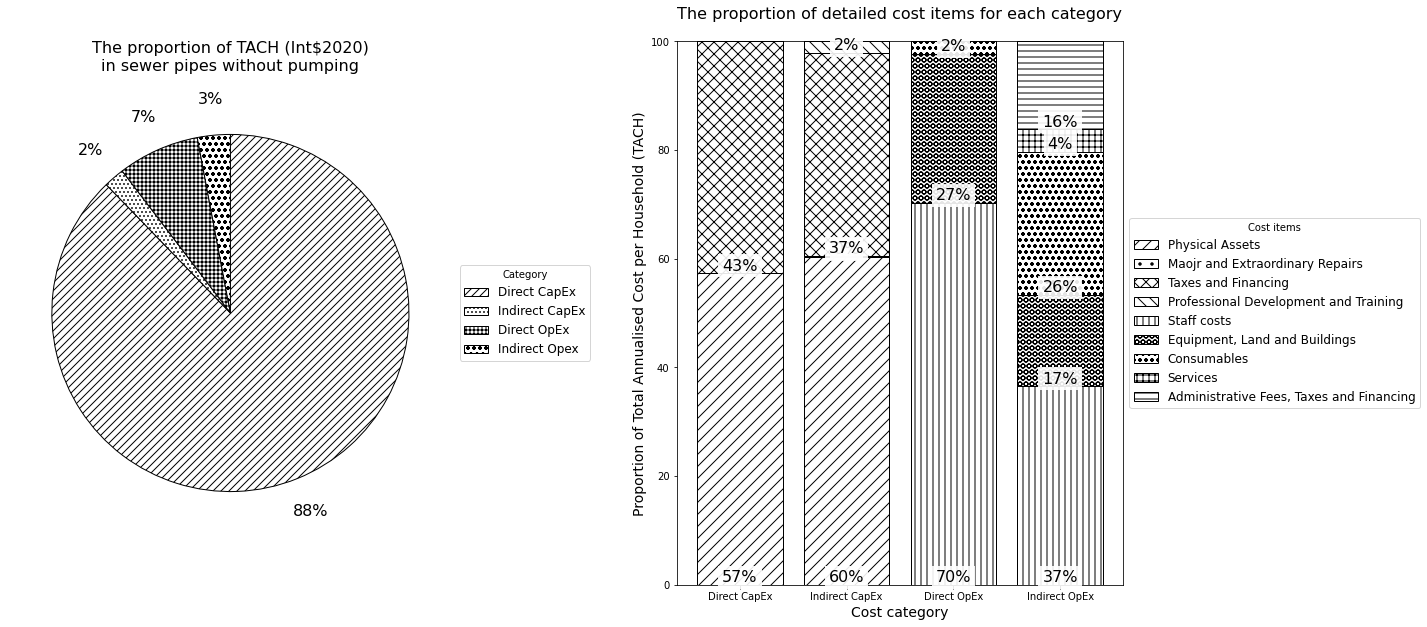

In [484]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

df = pd.read_excel(path_excel, sheet_name="E&T_total")

# fig, ax = plt.subplots()

wedges, labels, _ = ax1.pie(
    df['TACH'], 
    colors='w',
    autopct='%.0f%%', 
    pctdistance=1.2, 
    startangle=90, 
    counterclock=False,
    wedgeprops={'linewidth': 1, 'edgecolor':"k"},
    textprops={'fontsize': 16})

hatches = ['///', '...', '+++', 'oo']  # ハッチングの種類を指定する
for i, wedge in enumerate(wedges):
    wedge.set_hatch(hatches[i % len(hatches)])

ax1.set_title('The proportion of TACH (Int$2020)\nin sewer pipes without pumping', loc='center', x=0.5, y=1.03, fontsize=16)
ax1.legend(wedges, df['Category'], title='Category', loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":12})

df = pd.read_excel(path_excel, sheet_name="E&T_detail")

row_sums = df.sum(axis=1, numeric_only=True)
for i, row in df.iterrows():
    for j, column in enumerate(df.loc[i][1:]):
        percent = (column / row_sums[i]) * 100
        df.loc[i, df.columns[j + 1]] = percent

# fig, ax = plt.subplots(figsize=[6,6])

# 値ラベルを表示するための関数
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax2.annotate(
                f"{height:.0f}%", 
                xy=(rect.get_x() + rect.get_width() / 2, rect.get_y()),
                xytext=(0, 0), 
                textcoords="offset points", 
                ha='center', 
                va='bottom', 
                fontsize=16, 
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))

bottom = None
hatches = ['//', '.', 'xx', '\\\\', '||', 'OO', 'oo', '++', '--']  # ハッチングの種類を指定する
for i, column in enumerate(df.columns[1:]):
    bar = ax2.bar(df.iloc[:, 0], df[column], color='w', edgecolor='k', bottom=bottom, label=column, hatch=hatches[i % len(hatches)])
    autolabel(bar)
    bottom = df[column] if bottom is None else bottom + df[column]

ax2.set_title('The proportion of detailed cost items for each category', loc='center', x=0.5, y=1.03, fontsize=16)
ax2.set_xlabel('Cost category', fontsize=14)
ax2.set_ylabel('Proportion of Total Annualised Cost per Household (TACH)', fontsize=14)

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":12}, title="Cost items")

plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.savefig("fig3-3_sewer_comp_cost.png", format="png", dpi=700, transparent=True, bbox_inches='tight')
plt.show()